<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=160px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Erdos-Renyi and Clustering Coefficient</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import networkx as nx

import watermark

%load_ext watermark
%matplotlib inline

Watermark the notebook with current versions of all loaded libraries

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 7afbd3e3d3f4c8c2d7fddea3785bc5eca6ce516e

watermark : 2.1.0
pandas    : 1.1.3
networkx  : 2.5
numpy     : 1.19.2
matplotlib: 3.3.2
json      : 2.0.9



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Graph Models

### Erdős-Rényi 

Graph models are simple algorithms to generate graph topologies. We start with Erdős-Rényi model where each pair of nodes is added with a fixed probability

In [4]:
def erdos_renyi_graph(N, p):
    nodes = list(range(N))
    edges = []
    
    # Try every pair of edges
    for i in range(N):
        for j in range(i+1, N):
            
            # add egdge with probability p
            if np.random.random() < p:
                edges.append((i, j))
    
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

Let's generate a relatively small ER graph

In [5]:
ER = erdos_renyi_graph(10_000, 0.01)

With these parameters, we expect the average degree to be $\langle k\rangle=Np=100$ and the distribution to be approximately Gaussian. We start by generating the degre distribution

In [6]:
Pk = pd.DataFrame(Counter(dict(ER.degree()).values()).items(), columns=['k', 'Pk']).sort_values('k')
Pk.Pk/=10_000

And compute the theoretical distribution

In [7]:
Pk_theory = Pk.copy()
Pk_theory.Pk = Pk_theory.k.map(lambda k: np.exp(-100)/np.math.factorial(k)*100**k)

So that we can more easily compare them:

Text(0, 0.5, 'P(k)')

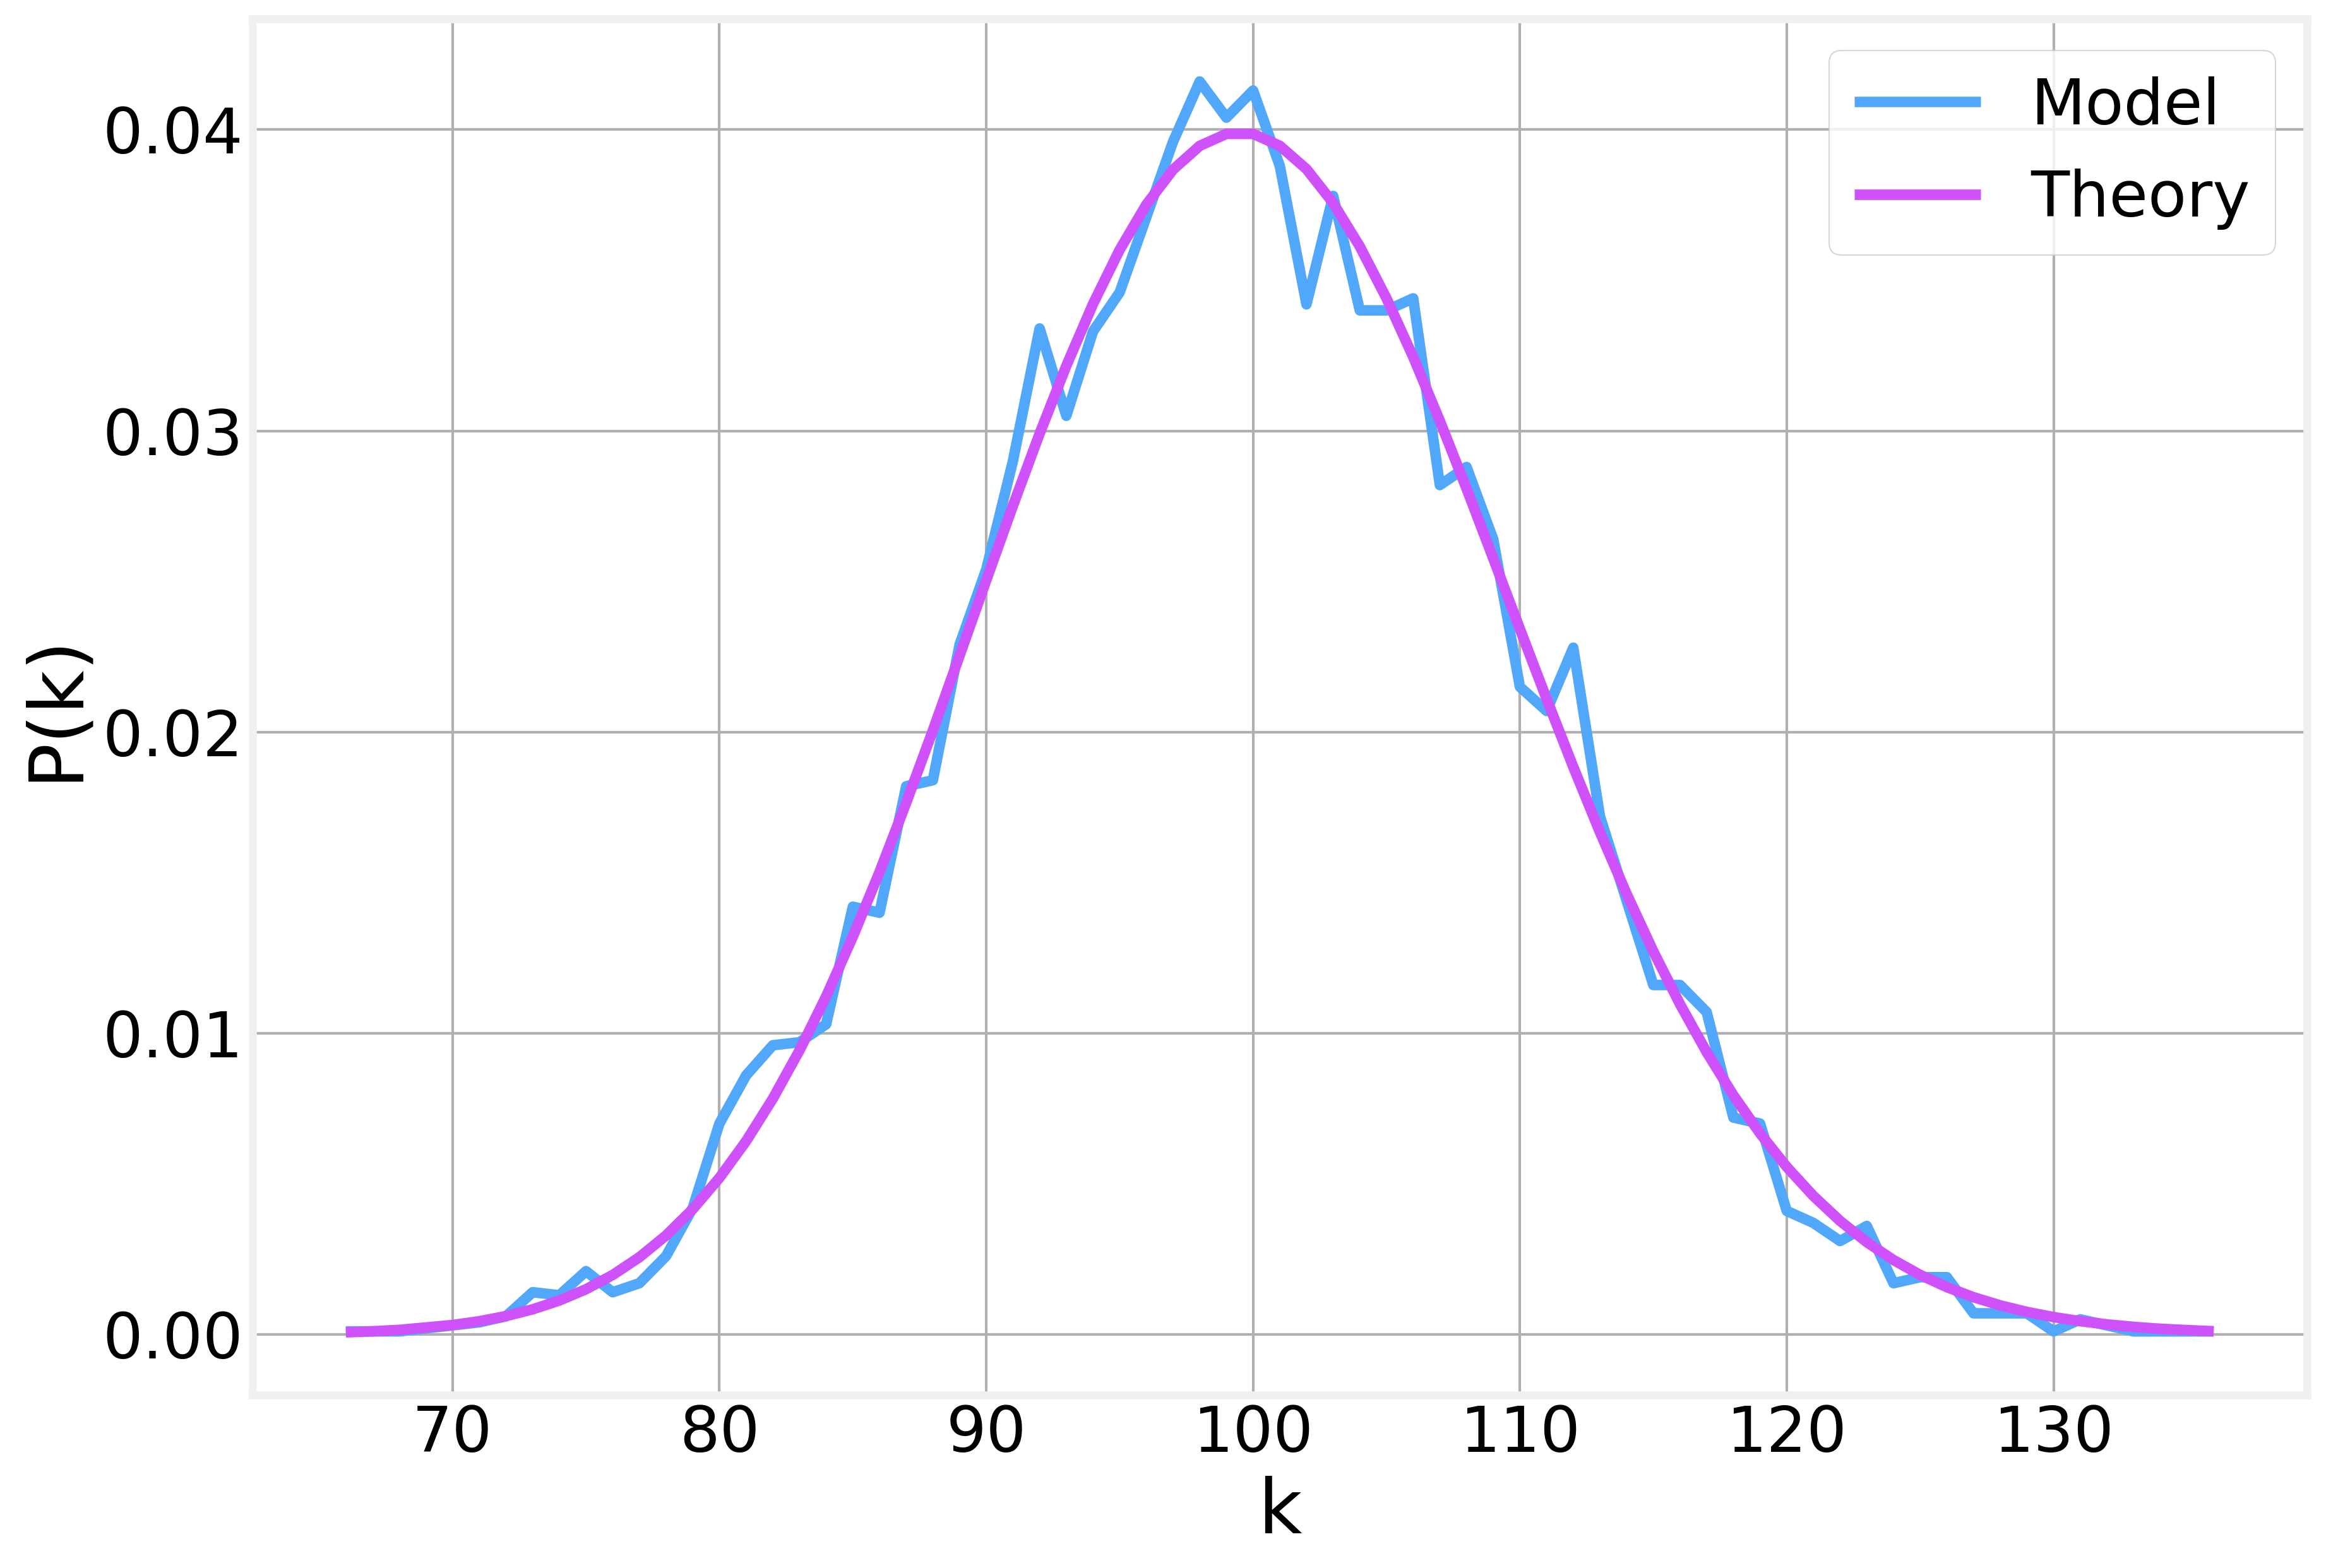

In [8]:
ax = Pk.plot(x='k', y='Pk')
Pk_theory.plot(x='k', y='Pk', ax=ax)
ax.legend(['Model', 'Theory'])
ax.set_xlabel('k')
ax.set_ylabel('P(k)')

Not a bad math at all!

Finally, the average degree is, simply:

$$\langle k \rangle=\sum_k k P(k)$$

In [9]:
kavg = np.dot(Pk.k, Pk.Pk)
print(kavg)

99.8166


as expected

# Clustering Coefficient

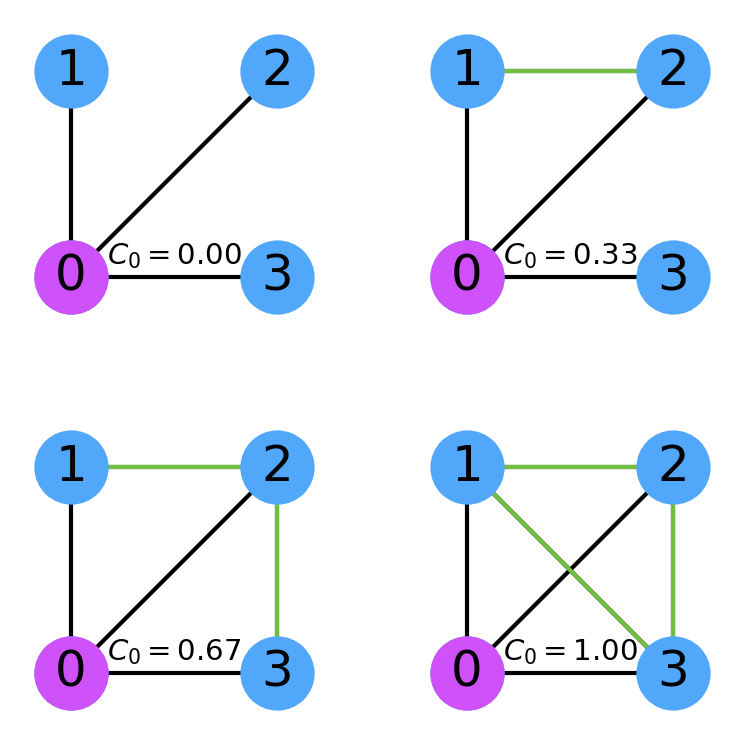

In [10]:
fig, ax_lst = plt.subplots(2,2, figsize=(3, 3))
ax_lst = np.array(ax_lst).flatten()

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, i) for i in range(1, 4)])

edge_seq = [[], [1, 2], [2, 3], [1, 3]]

pos = {
    0: (0, 0),
    1: (0, 1),
    2: (1, 1),
    3: (1, 0)}

for i in range(4):
    if i > 0:
        G.add_edge(*edge_seq[i])
    
    nx.draw(G, pos, ax=ax_lst[i], node_color=colors[0])
    nx.draw_networkx_nodes(G, pos, [0], ax=ax_lst[i], node_color=colors[1])
    nx.draw_networkx_labels(G, pos, ax=ax_lst[i])
    
    C = nx.clustering(G)[0]
    ax_lst[i].text(0.5, 0.1, r"$C_0=%1.2f$" % C, fontsize=7, ha='center', va='center')

    
    if i>0:
        nx.draw_networkx_edges(G, pos, list(edge_seq[1:i+1]), ax=ax_lst[i], edge_color=colors[2])
    
    ax_lst[i].axis('off')
    ax_lst[i].set_xlim(-0.2, 1.2)
    ax_lst[i].set_ylim(-0.2, 1.2)

fig.tight_layout()

Let us define a simple function to extract the adjacency matrix of a graph

In [11]:
def get_adjacency_matrix(G):
    N = G.number_of_nodes()
    
    A = np.zeros((N, N))
    
    for node_i, node_j in G.edges():
        A[node_i, node_j] = 1
        A[node_j, node_i] = 1
        
    return A

In [12]:
A = get_adjacency_matrix(ER)

We compute the number of triangles for each node using matrix multiplication. In practice, there are significanlty more efficient ways of doing for large networks

In [13]:
triangles = np.diag(np.linalg.matrix_power(A, 3))

And compute the degree coefficient of each node

In [14]:
deg = ER.degree()

In [15]:
C = [count/(deg(i)*(deg(i)-1)) for i, count in enumerate(triangles)]

The average clustering coefficient is then:

In [16]:
np.mean(C)

0.009969963891353455

Which is pretty close to the value of p, as expected

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>